# Simulating electron - proton collisions 

### Day-1 : Introduction and first run

We will first initialize our simulation toolkit - PYTHIA (pythia.org) and run a few collisions of electrons and protons at varying energies and begin to study the output  


In [1]:
# Importing useful headers
import pythia8
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Initialize the pythia object and setup the type of collisions 

In [2]:
pythia = pythia8.Pythia()
#Set up incoming beams, for frame with unequal beam energies.
pythia.readString("Beams:frameType = 2")

True

In [3]:
# Set the proton energy - 
pEnergy = 920
#BeamA = proton.
pythia.readString("Beams:idA = 2212")
pythia.settings.parm("Beams:eA", pEnergy)

In [4]:
# Set the electron energy - 
eEnergy = 500
#BeamB = electron.
pythia.readString("Beams:idB = 11")
pythia.settings.parm("Beams:eB", eEnergy)

In [5]:
#Set up DIS process within some phase space.
#Neutral current (with gamma/Z interference).
pythia.readString("WeakBosonExchange:ff2ff(t:gmZ) = on")

#Phase-space cut: minimal Q2 of process.
pythia.settings.parm("PhaseSpace:Q2Min", 25)

#Set dipole recoil on. Necessary for DIS + shower.
pythia.readString("SpaceShower:dipoleRecoil = on")

#Allow emissions up to the kinematical limit,
#since rate known to match well to matrix elements everywhere.
pythia.readString("SpaceShower:pTmaxMatch = 2")

#QED radiation off lepton not handled yet by the new procedure.
pythia.readString("PDF:lepton = off")
pythia.readString("TimeShower:QEDshowerByL = off")

pythia.init()

True

In [6]:
Number_of_events = 10

In [6]:
pythia.next()

part_pt = []
part_eta = []
part_theta = []
part_phi = []
part_E = []
part_p = []
part_m = []
part_id = []

for particle in pythia.event:
    #if 1:
    if particle.isFinal():
        pT = float('%.3g' % particle.pT())
        part_pt.append(pT)
        eta = float('%.3g' % particle.eta())
        part_eta.append(eta)
        theta = float('%.3g' % particle.theta())
        part_theta.append(theta)
        phi = float('%.3g' % particle.phi())
        part_phi.append(phi)
        E = float('%.3g' % particle.e())
        part_E.append(E)
        p = float('%.3g' % particle.pAbs())
        part_p.append(p)
        mass = float('%.3g' % particle.m())
        part_m.append(mass)
        part_id.append(particle.id())
        print(particle.id(), pT, eta, theta, phi, E, p, mass)

part_pt = np.array(part_pt)
part_phi = np.array(part_phi)
part_eta = np.array(part_eta)
part_theta = np.array(part_theta)
part_E = np.array(part_E)
part_p = np.array(part_p)
part_m = np.array(part_m)
part_id = np.array(part_id)
particles = np.vstack((part_id, part_pt, part_phi, part_eta, part_theta, part_E, part_p, part_m)).T

11 8.64 -4.69 3.12 0.884 470.0 470.0 0.000511
211 0.163 5.8 0.00603 -1.97 27.1 27.1 0.14
-211 0.527 7.69 0.000913 2.27 577.0 577.0 0.14
211 0.388 6.48 0.00308 0.942 126.0 126.0 0.14
-211 0.267 5.79 0.00612 0.626 43.7 43.7 0.14
211 0.712 4.36 0.0255 -0.978 27.9 27.9 0.14
-211 0.187 4.38 0.025 1.35 7.47 7.47 0.14
211 0.21 4.25 0.0285 0.571 7.35 7.35 0.14
-211 0.531 -1.05 2.47 -0.9 0.86 0.849 0.14
211 0.346 0.0678 1.5 -0.301 0.374 0.347 0.14
-211 2.42 -1.9 2.85 -2.09 8.28 8.28 0.14
321 6.31 -1.84 2.83 -2.25 20.4 20.4 0.494
211 0.235 4.04 0.0353 -0.00341 6.66 6.66 0.14
-211 0.469 3.67 0.051 -3.14 9.21 9.21 0.14
2112 0.23 3.2 0.0811 1.29 2.99 2.83 0.94
-2212 0.441 1.12 0.631 -2.63 1.2 0.747 0.938
211 0.243 0.821 0.829 2.01 0.358 0.33 0.14
2212 0.52 5.59 0.00746 1.11 69.6 69.6 0.938
-211 0.132 5.11 0.0121 2.13 10.9 10.9 0.14
22 0.477 -0.974 2.42 -2.56 0.722 0.722 0.0
22 0.403 0.176 1.4 -2.86 0.409 0.409 0.0
22 0.267 2.06 0.253 -3.06 1.06 1.06 0.0
22 0.0691 3.01 0.0984 3.1 0.703 0.703 0.0


#### Worksheet to guide the structured tutorial, varying the setup - to build intuition 
what did we start with, and what did we change, and what did we see - learning objectives for the day 
something to guide the activities 
connect to big picture of why it matters 
### where did we get this simulation from? is this just random or what are these numbers 
#### dice rolls 

In [7]:
Event_Particles = pd.DataFrame(particles, columns=['ID','pT','phi','eta','theta','Energy', 'momentum','mass'])
Event_Particles

,ID,pT,phi,eta,theta,Energy,momentum,mass
0,11.0,8.6400,0.88400,-4.6900,3.120000,470.000,470.000,0.000511
1,211.0,0.1630,-1.97000,5.8000,0.006030,27.100,27.100,0.140000
2,-211.0,0.5270,2.27000,7.6900,0.000913,577.000,577.000,0.140000
3,211.0,0.3880,0.94200,6.4800,0.003080,126.000,126.000,0.140000
4,-211.0,0.2670,0.62600,5.7900,0.006120,43.700,43.700,0.140000
5,211.0,0.7120,-0.97800,4.3600,0.025500,27.900,27.900,0.140000
6,-211.0,0.1870,1.35000,4.3800,0.025000,7.470,7.470,0.140000
7,211.0,0.2100,0.57100,4.2500,0.028500,7.350,7.350,0.140000
8,-211.0,0.5310,-0.90000,-1.0500,2.470000,0.860,0.849,0.140000
9,211.0,0.3460,-0.30100,0.0678,1.500000,0.374,0.347,0.140000


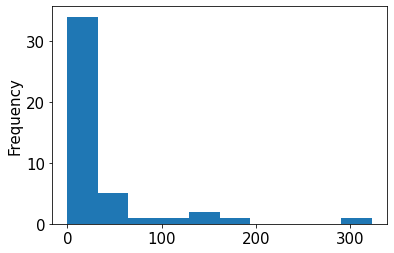

In [114]:
Event_Particles['Energy'].plot.hist()
plt.show()

In [9]:
Number_of_events = 10

delphi = []
deleta = []
scattered_pT = []
photon_pT = []

# Begin event loop. Generate event. Skip if error.
for iEvent in range(0, Number_of_events):
    if not pythia.next():
        continue
    proton = pythia.event[1].p()
    electron_in = pythia.event[4].p()
    electron_out = pythia.event[6].p()
    photon = electron_in - electron_out
    deta = photon.eta()
    dphi = photon.phi()
    if dphi > 3.1415:
        dphi = 6.2832 - dphi    
    delphi.append(dphi)
    deleta.append(deta)
    scattered_pT.append(electron_out.pT())
    photon_pT.append(photon.pT())

delphi = np.array(delphi)
deleta = np.array(deleta)
scattered_pT = np.array(scattered_pT)
photon_pT = np.array(photon_pT)
# End of event loop. Statistics. Histogram. Done.
pythia.stat()


(array([3., 0., 1., 0., 1., 1., 1., 0., 2., 1.]),
 array([-3.03869527, -2.73871515, -2.43873503, -2.13875492, -1.8387748 ,
        -1.53879468, -1.23881456, -0.93883444, -0.63885432, -0.33887421,
        -0.03889409]),
 <BarContainer object of 10 artists>)

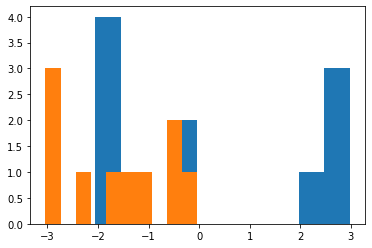

In [10]:
plt.hist(delphi, bins=10)
plt.hist(deleta, bins=10)

(array([3., 1., 1., 0., 0., 3., 0., 1., 0., 1.]),
 array([ 5.49119279,  6.32364635,  7.15609991,  7.98855347,  8.82100704,
         9.6534606 , 10.48591416, 11.31836772, 12.15082128, 12.98327485,
        13.81572841]),
 <BarContainer object of 10 artists>)

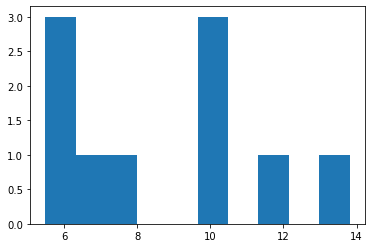

In [11]:
#plt.hist(scattered_pT)
plt.hist(photon_pT)

(array([3., 1., 1., 0., 0., 3., 0., 1., 0., 1.]),
 array([ 5.49119279,  6.32364635,  7.15609991,  7.98855347,  8.82100704,
         9.6534606 , 10.48591416, 11.31836772, 12.15082128, 12.98327485,
        13.81572841]),
 <BarContainer object of 10 artists>)

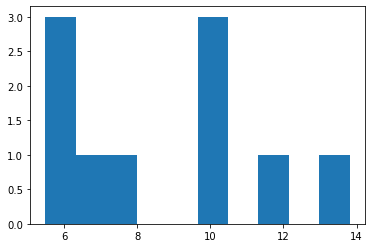

In [12]:
plt.hist(scattered_pT)

In [13]:
# check struck quark index in pythia event
counter = 0
for particle in pythia.event:
    if (particle.status() == -23 and particle.id() != 11):
        print(counter)
    counter += 1

5


In [14]:
electron_in = pythia.event[4].p() # 4 vector
electron_out = pythia.event[6].p()
photon = electron_in - electron_out
quark = pythia.event[5].p()

In [15]:
photon.m2Calc() # check Q2

-141.24467286496974

In [16]:
radii = [0, 100, 200, 300, 400, 500, 600]
r_labels = ['$0$','$100$','$200$','$300$','$400$','$500$','$600$']
angles = [0, 2.09858297, 5.70047087, 15.4146268, 40.3950626, 90, 139.604937421, 164.585373193, 174.299529125, 177.90141703, 180]
eta_labels=['','','3','2','1','0','-1','-2','-3','','']
nr = 600
ntheta = 90

470.0


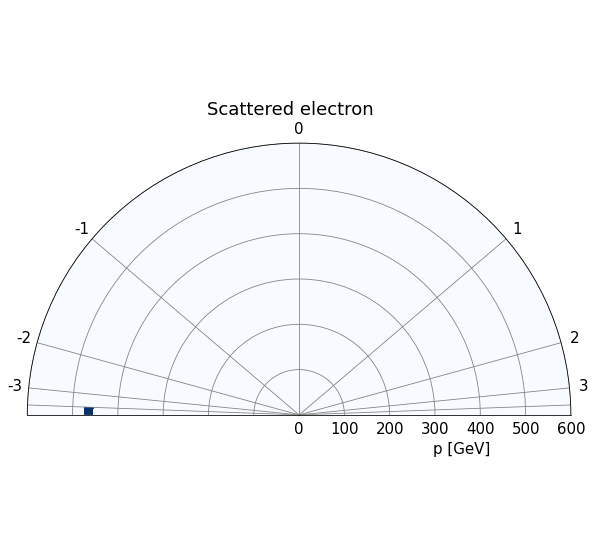

In [17]:
fig = plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = '15'

ax1 = fig.add_subplot(111, polar=True)

r_edges = np.linspace(0, nr, 30)
theta_edges = np.linspace(0, np.pi, ntheta + 1)
H_e = plt.hist2d([Event_Particles.iloc[0]['momentum']], [Event_Particles.iloc[0]['theta']], [r_edges, theta_edges])[0]
ax1.cla()

Theta, R = np.meshgrid(theta_edges, r_edges)
im_e = ax1.pcolormesh(Theta, R, H_e, cmap='Blues')
ax1.set_thetagrids(angles, labels=eta_labels, fontsize=15)
ax1.set_xlabel('p [GeV]')
ax1.xaxis.set_label_coords(0.8, 0.2)
ax1.grid(color='grey')
im_e.set_clim(0,1)
ax1.set_thetamax(180)
fig.suptitle('Scattered electron', y=0.75)
print(Event_Particles.iloc[0]['momentum'])

Text(0.5, 0.75, 'Other final state particles')

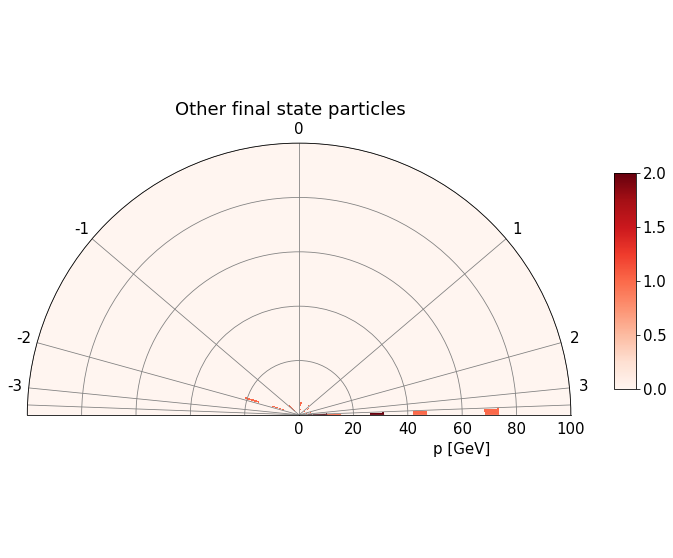

In [19]:
fig = plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = '15'

ax1 = fig.add_subplot(111, polar=True)

#r_edges = np.linspace(0, nr, 30)
r_edges = np.linspace(0, 100, 20)
theta_edges = np.linspace(0, np.pi, ntheta + 1)
H_e = plt.hist2d([Event_Particles.iloc[0]['momentum']], [Event_Particles.iloc[0]['theta']], [r_edges, theta_edges])[0]
H = plt.hist2d(Event_Particles.iloc[1:]['momentum'], Event_Particles.iloc[1:]['theta'], [r_edges, theta_edges])[0]
ax1.cla()

Theta, R = np.meshgrid(theta_edges, r_edges)
im = ax1.pcolormesh(Theta, R, H, cmap='Reds')
ax1.set_thetagrids(angles, labels=eta_labels, fontsize=15)
ax1.set_xlabel('p [GeV]')
ax1.xaxis.set_label_coords(0.8, 0.2)
ax1.grid(color='grey')
im_e.set_clim(0,1)
cbar = fig.colorbar(im, shrink=0.7, pad=0.01, cax=plt.axes([0.95, 0.35, 0.03, 0.3]))
cbar.ax.tick_params(labelsize=15)
im.set_clim(0,2)
ax1.set_thetamax(180)
fig.suptitle('Other final state particles', y=0.75)

   -11.347     1.878   -31.776    31.635 (  -11.885)

33.79380419876932 2.7943055212785133


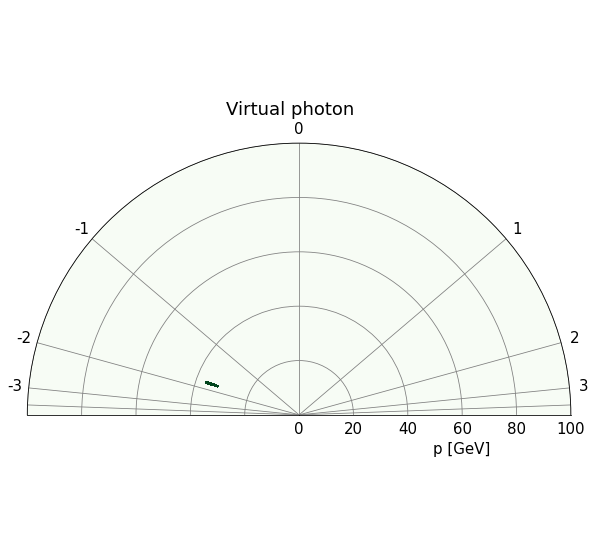

In [21]:
fig = plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = '15'

ax1 = fig.add_subplot(111, polar=True)

r_edges = np.linspace(0, 100, 20)
theta_edges = np.linspace(0, np.pi, ntheta + 1)
H_e = plt.hist2d([photon.pAbs()], [photon.theta()], [r_edges, theta_edges])[0]
ax1.cla()

Theta, R = np.meshgrid(theta_edges, r_edges)
im_e = ax1.pcolormesh(Theta, R, H_e, cmap='Greens')
ax1.set_thetagrids(angles, labels=eta_labels, fontsize=15)
ax1.set_xlabel('p [GeV]')
ax1.xaxis.set_label_coords(0.8, 0.2)
ax1.grid(color='grey')
im_e.set_clim(0,1)
ax1.set_thetamax(180)
fig.suptitle('Virtual photon', y=0.75)

print(photon)
print(photon.pAbs(),photon.theta())

   -11.347     1.878   -30.645    32.767 (    1.500)

32.732390480958344 2.7825430197745806


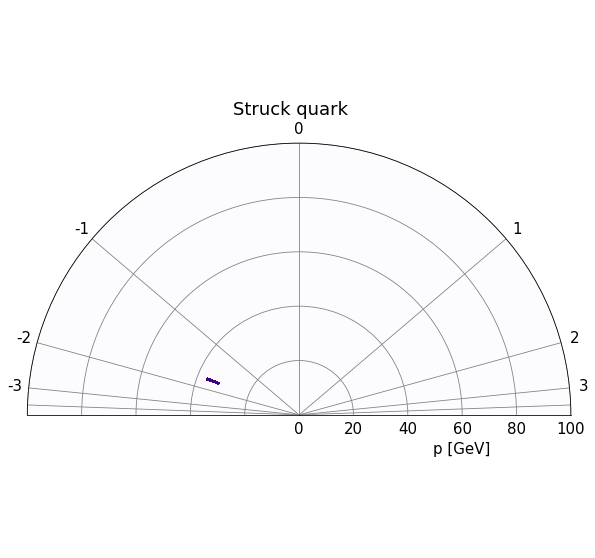

In [22]:
fig = plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = '15'

ax1 = fig.add_subplot(111, polar=True)

r_edges = np.linspace(0, 100, 20)
theta_edges = np.linspace(0, np.pi, ntheta + 1)
H_e = plt.hist2d([quark.pAbs()], [quark.theta()], [r_edges, theta_edges])[0]
ax1.cla()

Theta, R = np.meshgrid(theta_edges, r_edges)
im_e = ax1.pcolormesh(Theta, R, H_e, cmap='Purples')
ax1.set_thetagrids(angles, labels=eta_labels, fontsize=15)
ax1.set_xlabel('p [GeV]')
ax1.xaxis.set_label_coords(0.8, 0.2)
ax1.grid(color='grey')
im_e.set_clim(0,1)
ax1.set_thetamax(180)
fig.suptitle('Struck quark', y=0.75)

print(quark)
print(quark.pAbs(),quark.theta())

In [23]:
from mpl_toolkits import mplot3d

Text(0.5, 0, '$p_T$ [GeV]')

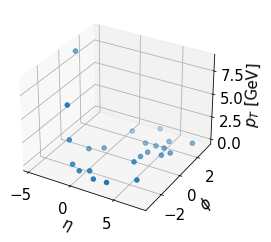

In [24]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = Event_Particles['pT']
xdata = Event_Particles['eta']
ydata = Event_Particles['phi']
filled=np.ones((len(xdata), len(ydata), len(zdata)))
ax.scatter3D(xdata, ydata, zdata)
ax.set_xlabel('$\eta$')
ax.set_ylabel('$\phi$')
ax.set_zlabel('$p_T$ [GeV]')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

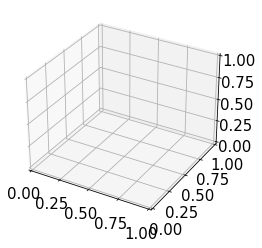

In [169]:
import matplotlib.cm as cm

x = Event_Particles['eta']
y = Event_Particles['phi']
z = Event_Particles['pT']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

hist, xedges, yedges = np.histogram2d(x, y, bins=(100,100))
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = zpos.flatten()/2.

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz] 

#ax.bar3d(xpos, ypos, zpos, dx, dy, dzEvent_Particles['phi'])
ax.bar3d(x,y,z,dx,dy,dz, color=rgba)
plt.xlabel('$\eta$')
plt.ylabel('$\phi$')
ax.set_zlabel('$p_T$ [GeV]$')

In [170]:
Event_Particles.to_csv('event.csv')

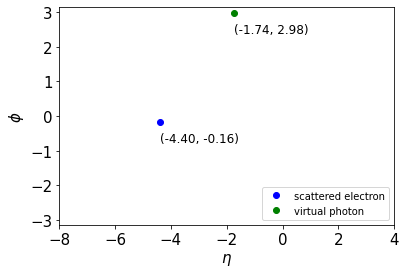

In [25]:
plt.plot(electron_out.eta(), electron_out.phi(), 'bo', label='scattered electron')
plt.plot(photon.eta(), photon.phi(), 'go', label='virtual photon')
A = [electron_out.eta(), photon.eta()]
B = [electron_out.phi(), photon.phi()]
plt.xlim(-8,4)
plt.ylim(-np.pi, np.pi)
plt.legend(fontsize=10, loc='lower right')
plt.xlabel('$\eta$')
plt.ylabel('$\phi$')
for xy in zip(A, B):
    plt.annotate('(%.2f, %.2f)' % xy, xy=xy, xytext=(0,-20), textcoords='offset points', fontsize=12)

In [26]:
print(photon.phi()-electron_out.phi())

3.141592653589793


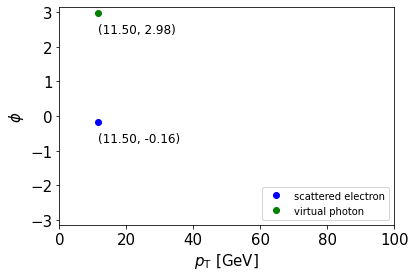

In [27]:
plt.plot(electron_out.pT(), electron_out.phi(), 'bo', label='scattered electron')
plt.plot(photon.pT(), photon.phi(), 'go', label='virtual photon')
A = [electron_out.pT(), photon.pT()]
B = [electron_out.phi(), photon.phi()]
plt.xlim(0,100)
plt.ylim(-np.pi, np.pi)
plt.legend(fontsize=10, loc='lower right')
plt.xlabel('$p_\mathrm{T}$ [GeV]')
plt.ylabel('$\phi$')
for xy in zip(A, B):
    plt.annotate('(%.2f, %.2f)' % xy, xy=xy, xytext=(0,-20), textcoords='offset points', fontsize=12)

In [28]:
delphi = []
deleta = []
scattered_pT = []
photon_pT = []
quark_pid = []

# Begin event loop. Generate event. Skip if error.
for iEvent in range(0, Number_of_events):
    if not pythia.next():
        continue
    proton = pythia.event[1].p()
    electron_in = pythia.event[4].p()
    electron_out = pythia.event[6].p()
    photon = electron_in - electron_out
    deta = photon.eta()
    dphi = photon.phi()
    if dphi > 3.1415:
        dphi = 6.2832 - dphi    
    delphi.append(dphi)
    deleta.append(deta)
    scattered_pT.append(electron_out.pT())
    photon_pT.append(photon.pT())
    quark_pid.append(pythia.event[5].id())

delphi = np.array(delphi)
deleta = np.array(deleta)
scattered_pT = np.array(scattered_pT)
photon_pT = np.array(photon_pT)
quark_pid = np.array(quark_pid)
# End of event loop. Statistics. Histogram. Done.
pythia.stat()

array([-4, -2,  1,  2, -1,  2, -2,  2,  2, -1])

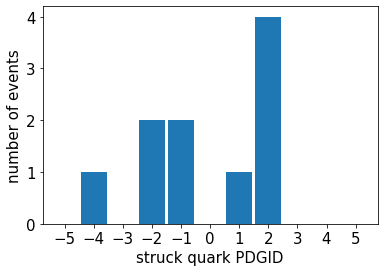

In [31]:
h = plt.hist(quark_pid, bins=np.arange(-5,7)-0.5, rwidth=0.9)
plt.xlabel('struck quark PDGID')
plt.ylabel('number of events')
plt.xticks(h[1] + 0.5)
plt.xlim(-5.75,5.75)
quark_pid